In [17]:
!pip install wordcloud

import os
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

os.chdir(r'C:\Users\vishn\Documents\Verge\Vishal Code copy\Vishal Code copy')
df = pd.read_csv('CLASS DATA remove words.csv')
df.shape

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(894, 20)

In [18]:
# iterating the columns 
for col in df.columns: 
    print(col) 

Class Name
Date of Class
Email Address
Registration Date/Time
Status
Amount Paid
Discount Code
First Name
Last Name
City
State
Zip/Postal Code
How did you hear about Peace at Home Parenting Solutions?
If you selected "Other" please specify:
I am a:
How many children do you have?
What are the ages of your children?
Concerns
Do you need Certificate?
COUNTRY (Pais)


In [19]:
# Creating a new column for saving the processed text output
import nltk
nltk.download('wordnet')
nltk.download('punkt')

df['Processed_Concerns'] = ''

for each in range(len(df)):
    # Removing punctuations and symbols
    temp_review = (re.sub(r"[,.:;?'\")(!]\d", ' ', str(df.loc[each,'Concerns']))).lower()
    
    # Lemmatization
    lemm_review = lemmatizer.lemmatize(temp_review)
    
    # Word Tokenization
    tokenized_review = word_tokenize(lemm_review)
    
    # Removing stopwords and 2 letter words
    filtered_review = [w for w in tokenized_review if not w in stop_words]
    filtered_review = [w for w in filtered_review if len(w) > 2]

    # Converting list to a string
    filtered_review = ' '.join(filtered_review)
    
    # Writing the processed sentence back to the dataframe
    df.loc[each, 'Processed_Concerns'] = filtered_review

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
# Checking if the processes column is generated
df['Processed_Concerns']

0                                               anything
1      handle tantrums calmly discourage tantrum gets...
2                                     feel like like one
3                       address chores teach life skills
4                                               patience
                             ...                        
889                          certificate given end class
890    daughter purposely chooses listen tell tell pu...
891        sons stepfat trying learn positive discipline
892                     remain open without telling much
893      give example tantrum situation keeps coming ...
Name: Processed_Concerns, Length: 894, dtype: object

In [21]:
# Creating tf-idf vector
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tf_idf = TfidfVectorizer(stop_words = stop_words, max_features = None,
                         max_df = 0.9,
                         min_df = 0.02)

X = tf_idf.fit_transform(df['Processed_Concerns'])

In [22]:
# Features from the tf-idf vector
print(tf_idf.get_feature_names())

['adhd', 'also', 'always', 'anxiety', 'back', 'behavior', 'best', 'better', 'care', 'child', 'class', 'control', 'daughter', 'deal', 'dealing', 'discipline', 'feel', 'get', 'getting', 'good', 'handle', 'help', 'home', 'ing', 'issues', 'keep', 'know', 'learn', 'like', 'listen', 'listening', 'make', 'manage', 'much', 'need', 'old', 'one', 'positive', 'school', 'self', 'skills', 'sleep', 'son', 'stop', 'stress', 'take', 'tantrums', 'things', 'time', 'tips', 'want', 'way', 'ways', 'without', 'work', 'would', 'year']


In [23]:
# Data must be sclaed before clustering
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# 'with_mean = False' for sparse matrices
sc = StandardScaler(with_mean = False)
X_scaled = sc.fit_transform(X)

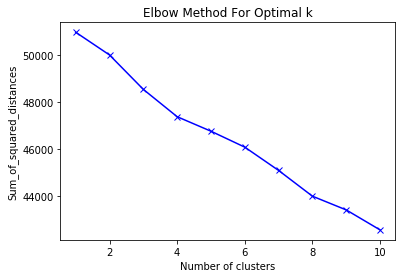

In [24]:
# Finding the best 'K' for k-means clustering
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(X_scaled)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [25]:
# k-means clustering with k=4
kmeans_model = KMeans(n_clusters = 4)
kmeans_model.fit(X_scaled)

# Saving the cluster number in the dataframe
df['Cluster_number'] = kmeans_model.labels_

df.head()

,Class Name,Date of Class,Email Address,Registration Date/Time,Status,Amount Paid,Discount Code,First Name,Last Name,City,...,How did you hear about Peace at Home Parenting Solutions?,"If you selected ""Other"" please specify:",I am a:,How many children do you have?,What are the ages of your children?,Concerns,Do you need Certificate?,COUNTRY (Pais),Processed_Concerns,Cluster_number
0,Free: How to Take the Stress Out of Parenting,1/10/2018,sanaashinaberry@yahoo.com,1/10/2018 10:53 AM EST,NaN,NaN,NaN,melissa,borck,balit,...,Google,NaN,NaN,one,hes 4 on jan 15,anything,NaN,NaN,anything,0
1,Free: How to Take the Stress Out of Parenting,1/10/2018,kmacwi2599@aol.com,1/9/2018 11:01 AM EST,NaN,NaN,NaN,Kristy,MacWilliams,Pittsfield,...,Therapist,NaN,NaN,1,6,How to handle tantrums calmly. How to discour...,NaN,NaN,handle tantrums calmly discourage tantrum gets...,0
2,Free: How to Take the Stress Out of Parenting,1/10/2018,josephmarisol0501@gmail.com,1/9/2018 4:26 AM EST,NaN,NaN,NaN,Marisol,Martinez,Coolidge,...,Online,NaN,NaN,4,"2year old baby girl , 6year old baby boy , 7 y...",Why do my s feel like I like one more then th...,NaN,NaN,feel like like one,2
3,Free: How to Take the Stress Out of Parenting,1/10/2018,1979helenrose@gmail.com,1/8/2018 2:23 PM EST,NaN,NaN,NaN,Helen,Hill,Stamford,...,google search,NaN,NaN,4,"16, 13, 9, 6",How to address chores that will teach our lif...,NaN,NaN,address chores teach life skills,0
4,Free: How to Take the Stress Out of Parenting,1/10/2018,cindycamel44@gmail.com,1/7/2018 3:02 AM EST,NaN,NaN,NaN,jacinta,dickerson,phx,...,Web site,NaN,NaN,5,12 8 10,Patience,NaN,NaN,patience,0


In [26]:
# Computing n-grams for Cluster_0
all_words = []
df_subset = df[df['Cluster_number'] == 0]

for each in range(len(df_subset)):
    tokens = word_tokenize(df.loc[each,'Processed_Concerns'])
    for i in tokens:
        all_words.append(i)
        
bigram = Counter(ngrams(all_words, 2))
output = pd.DataFrame.from_dict(bigram, orient='index').reset_index()
output.columns = ['Word', 'Count']
output = output.sort_values(by = ['Count'], ascending = False)
output.head()

,Word,Count
99,"(year, old)",60
37,"(would, like)",18
126,"(help, child)",16
652,"(get, listen)",11
885,"(ing, skills)",9


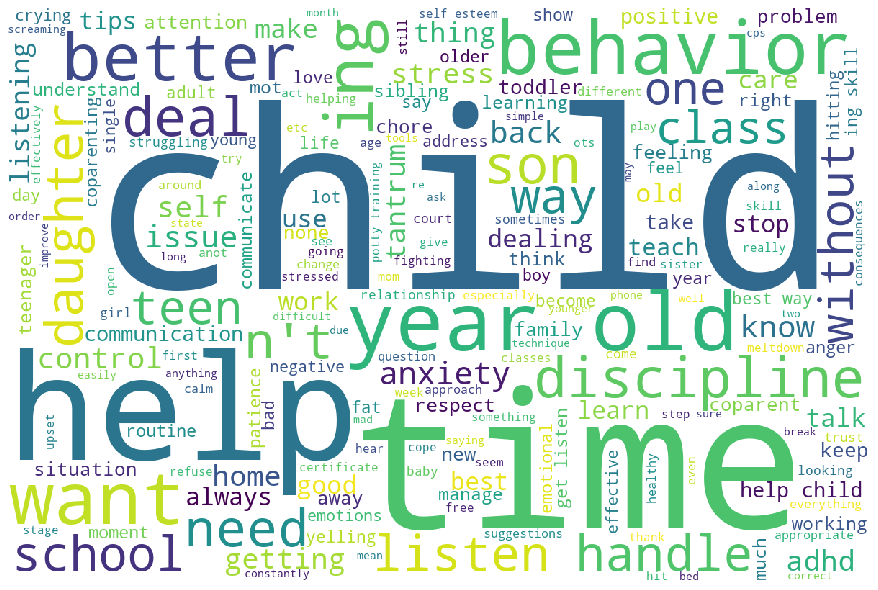

In [27]:
# A huge string with all the words
gg = ' '.join(all_words)

# Creating the Word Cloud
wordcloud = WordCloud(width = 1200, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(gg) 
  
# Plotting the Word Cloud image                        
plt.figure(figsize = (12, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [28]:
# Computing n-grams for Cluster_1
all_words = []
df_subset = df[df['Cluster_number'] == 1]

for each in range(len(df_subset)):
    tokens = word_tokenize(df.loc[each,'Processed_Concerns'])
    for i in tokens:
        all_words.append(i)
        
bigram = Counter(ngrams(all_words, 2))
output = pd.DataFrame.from_dict(bigram, orient='index').reset_index()
output.columns = ['Word', 'Count']
output = output.sort_values(by = ['Count'], ascending = False)
output.head()

,Word,Count
99,"(year, old)",2
0,"(anything, handle)",1
102,"(behavior, best)",1
104,"(practices, de-escalation)",1
105,"(de-escalation, toddler)",1


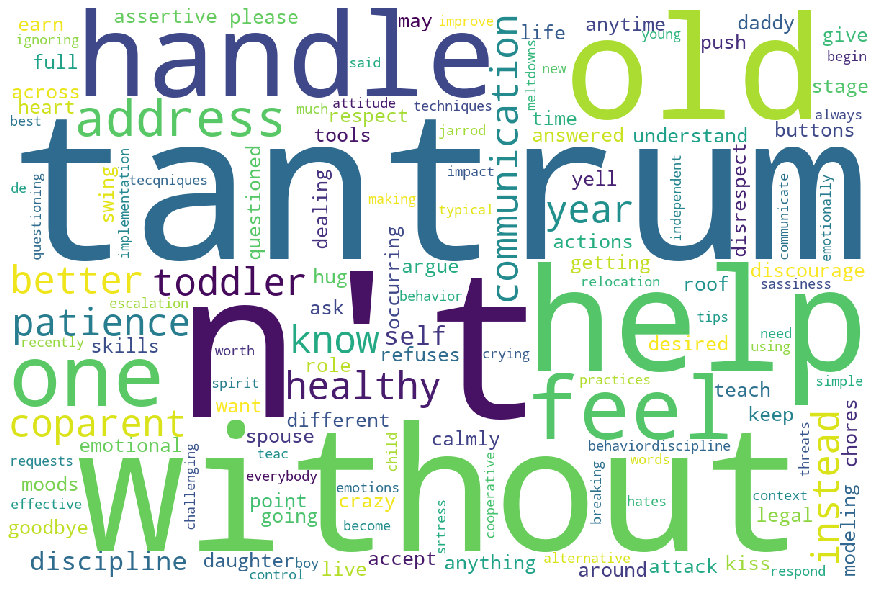

In [29]:
# A huge string with all the words
gg = ' '.join(all_words)

# Creating the Word Cloud
wordcloud = WordCloud(width = 1200, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(gg) 
  
# Plotting the Word Cloud image                        
plt.figure(figsize = (12, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [30]:
# Computing n-grams for Cluster_2
all_words = []
df_subset = df[df['Cluster_number'] == 2]

for each in range(len(df_subset)):
    tokens = word_tokenize(df.loc[each,'Processed_Concerns'])
    for i in tokens:
        all_words.append(i)
        
bigram = Counter(ngrams(all_words, 2))
output = pd.DataFrame.from_dict(bigram, orient='index').reset_index()
output.columns = ['Word', 'Count']
output = output.sort_values(by = ['Count'], ascending = False)
output.head()

,Word,Count
99,"(year, old)",3
0,"(anything, handle)",1
157,"(tips, improve)",1
146,"(healthy, help)",1
147,"(help, communicate)",1


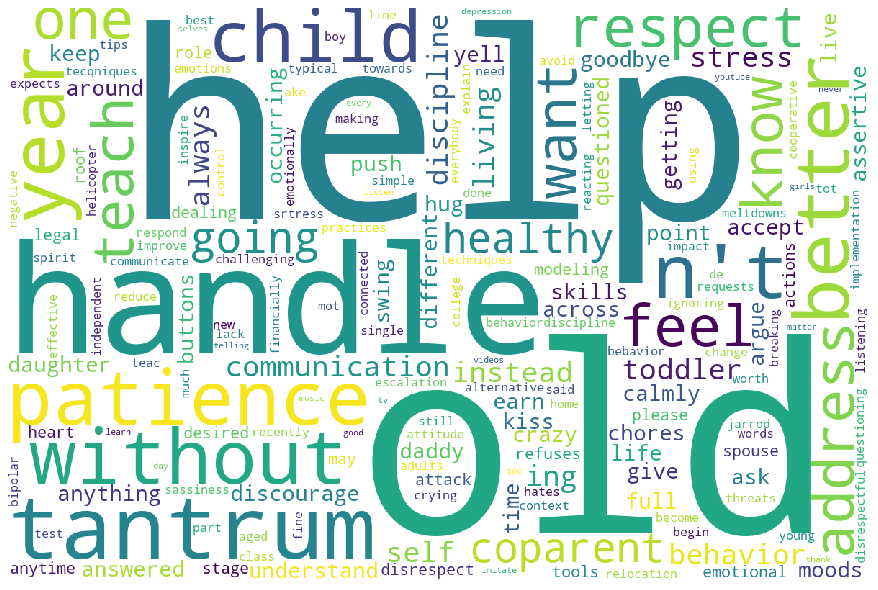

In [31]:
# A huge string with all the words
gg = ' '.join(all_words)

# Creating the Word Cloud
wordcloud = WordCloud(width = 1200, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(gg) 
  
# Plotting the Word Cloud image                        
plt.figure(figsize = (12, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [32]:
# Computing n-grams for Cluster_3
all_words = []
df_subset = df[df['Cluster_number'] == 3]

for each in range(len(df_subset)):
    tokens = word_tokenize(df.loc[each,'Processed_Concerns'])
    for i in tokens:
        all_words.append(i)
        
bigram = Counter(ngrams(all_words, 2))
output = pd.DataFrame.from_dict(bigram, orient='index').reset_index()
output.columns = ['Word', 'Count']
output = output.sort_values(by = ['Count'], ascending = False)
output.head()

,Word,Count
126,"(help, child)",3
99,"(year, old)",3
16,"(feel, like)",2
31,"(n't, want)",2
299,"(child, anxiety)",2


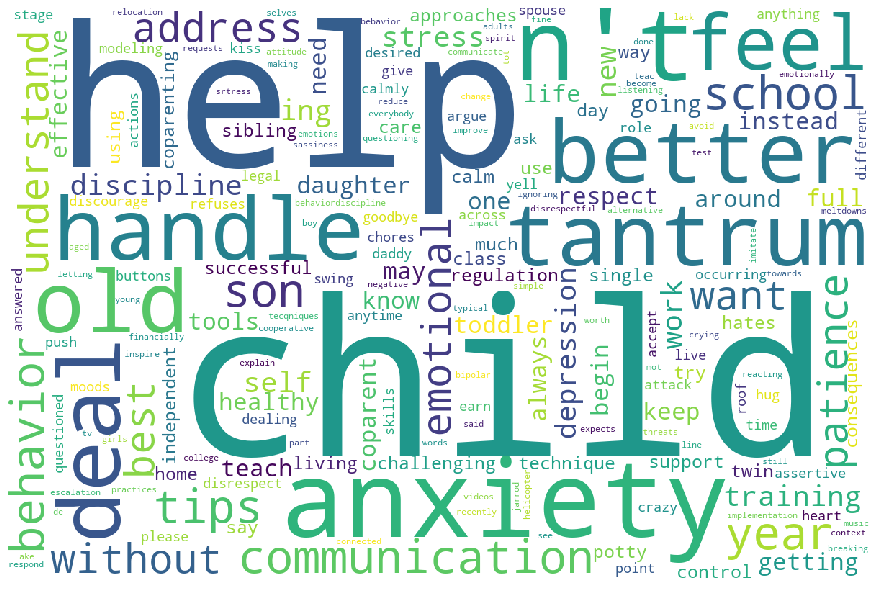

In [33]:
# A huge string with all the words
gg = ' '.join(all_words)

# Creating the Word Cloud
wordcloud = WordCloud(width = 1200, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(gg) 
  
# Plotting the Word Cloud image                        
plt.figure(figsize = (12, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()